# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

## 데이터 불러오기

In [2]:
df = pd.read_csv("dataset/labeled_data.csv", encoding='utf-8')
df.tail()

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
7991,5fa112859c0189cc66dabe34,2020-11-03 08:17:36,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.6,...,21.0,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7992,5fa112869c0189cc66dabe42,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.6,...,21.0,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,5fa112879c0189cc66dabe50,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.6,...,21.0,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7994,5fa112bb9c0189cc66dac22a,2020-11-03 08:19:35,2020-11-03 오전 12:00:00,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,NaN,9.6,...,21.0,22.299999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7995,5fa112bc9c0189cc66dac23a,2020-11-03 08:19:35,2020-11-03 오전 12:00:00,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,NaN,9.6,...,21.0,22.299999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       7996 non-null   object 
 1   TimeStamp                 7996 non-null   object 
 2   PART_FACT_PLAN_DATE       7996 non-null   object 
 3   PART_FACT_SERIAL          7996 non-null   int64  
 4   PART_NAME                 7996 non-null   object 
 5   EQUIP_CD                  7996 non-null   object 
 6   EQUIP_NAME                7996 non-null   object 
 7   PassOrFail                7996 non-null   object 
 8   Reason                    71 non-null     object 
 9   Injection_Time            7996 non-null   float64
 10  Filling_Time              7996 non-null   float64
 11  Plasticizing_Time         7996 non-null   float64
 12  Cycle_Time                7996 non-null   float64
 13  Clamp_Close_Time          7996 non-null   float64
 14  Cushion_

In [13]:
display(df['PassOrFail'].value_counts())
display(df['Reason'].value_counts())

PassOrFail
Y    7925
N      71
Name: count, dtype: int64

Reason
가스        35
초기허용불량    20
미성형       16
Name: count, dtype: int64

In [ ]:
# Reason 시각화

### 데이터의 속성별 의미
* _id : 제조 공정 id
* TimeStamp : 시간
* PART_FACT_PLAN_DATE : 생산을 지시한 날짜
* PART_FACT_SERIAL : 생산을 지시한 품목에 대한 코드 부여
* PART_NAME : 제품의 이름
* EQUIP_CD : 생산한 사출기 호기
* EQUIP_NAME : 생산한 사출기 모델명
* PassOrFail : 사출되는 각 물품 마다 검수자가 양품 선별을 하여 붙이는 레이블 값
* Reason : 검수자가 양품선별 시, 불량으로 확인된 제품에 대해 불량 유형을 나타냄 
* Injection_Time : 고압+사출시간(고압(사출압) : 재료를 금형에 유입시킬때의 압력), 사출 시간 : 재료를 금형에 유입시키는데 소요되는 시간
* Filling_Time : 충진시간으로 사출기에서 금형으로 내용물이 주입되는 시간
* Plasticizing_Time : 계량시간으로 재료를 스크류에 1번 생산할 만큼 용융되어 저장되는 시간
* Cycle_Time : 1번의 제품생산에 소요되는 생산시간
* Clamp_Close_Time : 제품이 생산되고 난후 열려있는 금형을 사출기가 닫아주고 빈틈이 없이 고정축과 이동축을 꽉 잡아주는데 걸리는 시간
* Cushion_Position :보압(사출압의 다음으로 가해지는 압력(금형내부압력을 조절하여 과충전을 방지))을 하기위한 스크류의 위치
* Switch_Over_Position : 고압,보압절환위치(고압(사출압)에서 보압으로 진행될때의 위치)
* Plasticizing_Position : 계량완료위치(계량을 마친 스크류의 위치)
* Clamp_Open_Position : 제품이 생산되어 추출하기위해 금형이 열리고 난 위치
* Max_Injection_Speed : 배럴에 계량되어 있는 용융수지가 금형으로 흘러들어가는데 측정되는 최대속도
* Max_Screw_RPM : 사출을 위한 스크류의 최대속도
* Average_Screw_RPM : 사출을 위한 스크류의 평균속도
* Max_Injection_Pressure : 배럴에 계량되어 있는 용융수지가 금형으로 흘러들어가는데 가해지는 최대압력
* Max_Switch_Over_Pressure : 사출에서 보압(충진된 수지가 밀리지않게 압력을준다)으로 변환되는 압력
* Max_Back_Pressure : 수지가 계량이 되는중에 스크류가 밀려나는 현상을 저지하기위한 최대압력
* Average_Back_Pressure : 수지가 계량이 되는중에 스크류가 밀려나는 현상을 저지하기위한 평균압력
* Barrel_Temperature_1 ~ 7 : 계량 및 사출시 수지가 일정하게 용융(녹임)을 유지하기위해 온도가 일정해야한다
* Hopper_Temperature : 재료주입구의 온도(충분히 건조시켜주며 재료가 용융되는시간을 절약시켜주기위해 온도가 높아야한다)
* Mold_Temperature_1 ~ 12 : 재료주입구의 온도(충분히 건조시켜주며 재료가 용융되는시간을 절약시켜주기위해 온도가 높아야한다)

## 사출 성형기 불량 요인 분석
### 주요 원인들
* 원료 공급불량
* 충전압력 부족
* 금형 내 유동 중의 원료 고화
* 금형 내의 공기 저항
* 성형품 주입부 이외의 부분으로 용융 플라스틱 유출되어 고화
* 압축되어진 용융 플라스틱의 온도 저하에 의한 체적의 감소, 압력 저하에 동반하는 체적의 증가 균형이 깨지는 것이 직접원인
* 용융원료가 금형 내를 주름 상으로 파동하며 흘러서 금형면과 보다 많이 접촉한 부분이 앞서 고화되는 문제
* 성형품이 고화되기 전에 표면을 가스가 지나간 흔적으로 인해 은조흔 발생생
* 금형면에 플라스틱이 충분히 압착되지 못하기도 하고 노즐로부터 배출된 가스가 금형표면에 응축해서 플라스틱 층과 금형면의 직접 접착을 방해하는 것이 원인
* 성형품에 빈틈부가 있는 경우 두께의 변화가 있어 두꺼운 부분으로부터 엷은 부분으로 일방적으로 원료를 흐르게 하지 않는 경우 게이트가 2개 이상있는 경우에는 웰드라인의 발생은 피할 수 없다.
* 다량의 가스가 노즐로부터 방출되어지기도 하고 금형 내에서 용융 플라스틱에 충분한 압력이 작용하지 않는 경우에 발생한다.
* 성형수축률이 크고, 그 수치가 불균일한 두께에 따른 냉각속도의 차이 등으로 인해 부분적으로 상당히 변화하는 폴리에틸렌, 폴리프로필렌 등에서는 특히 문제가 되는 일이 많다.



### 주요 원인의 영향이 되는 속성들
* 양 관련 : Clamp_Open_Position, Plasticizing_Position, Switch_Over_Position, Cushion_Position
* 압력 관련 : Max_Injection_Pressure, Max_Switch_Over_Pressure, Average_Back_Pressure
* 온도 관련 : Barrel_Temperature_1 ~ 7, Hopper_Temperature, Mold_Temperature_1 ~ 12
* 속도 관련 : Average_Screw_RPM, Max_Screw_RPM, Max_Injection_Speed
* 시간 관련 : Injection_Time, Filling_Time, Plasticizing_Time, Cycle_Time, Clamp_Close_Time
### 필요없는 속성
* _id
* EQUIP_CD
* PART_FACT_SERIAL
* PART_FACT_PLAN_DATE
* TimeStamp

In [14]:
df = df.drop(columns=['_id', 'EQUIP_CD', 'PART_FACT_SERIAL', 'PART_FACT_PLAN_DATE', 'TimeStamp'])
df

,PART_NAME,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,NaN,9.59,4.47,16.920000,59.520000,7.13,653.409973,...,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,NaN,9.60,4.48,16.910000,59.580002,7.13,653.409973,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.60,4.48,16.910000,59.580002,7.13,653.409973,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.59,4.48,16.910000,59.560001,7.13,653.419983,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,NaN,9.59,4.48,16.910000,59.560001,7.13,653.419983,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.60,4.48,16.620001,59.560001,7.11,653.429993,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7992,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,NaN,9.60,4.48,16.650000,59.560001,7.11,653.429993,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.60,4.48,16.650000,59.560001,7.11,653.429993,...,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7994,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,NaN,9.60,4.48,16.629999,59.580002,7.11,653.429993,...,21.000000,22.299999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### NaN 값 확인


In [15]:
df.isnull().sum()

PART_NAME                      0
EQUIP_NAME                     0
PassOrFail                     0
Reason                      7925
Injection_Time                 0
Filling_Time                   0
Plasticizing_Time              0
Cycle_Time                     0
Clamp_Close_Time               0
Cushion_Position               0
Switch_Over_Position           0
Plasticizing_Position          0
Clamp_Open_Position            0
Max_Injection_Speed            0
Max_Screw_RPM                  0
Average_Screw_RPM              0
Max_Injection_Pressure         0
Max_Switch_Over_Pressure       0
Max_Back_Pressure              0
Average_Back_Pressure          0
Barrel_Temperature_1           0
Barrel_Temperature_2           0
Barrel_Temperature_3           0
Barrel_Temperature_4           0
Barrel_Temperature_5           0
Barrel_Temperature_6           0
Barrel_Temperature_7           0
Hopper_Temperature             0
Mold_Temperature_1             0
Mold_Temperature_2             0
Mold_Tempe

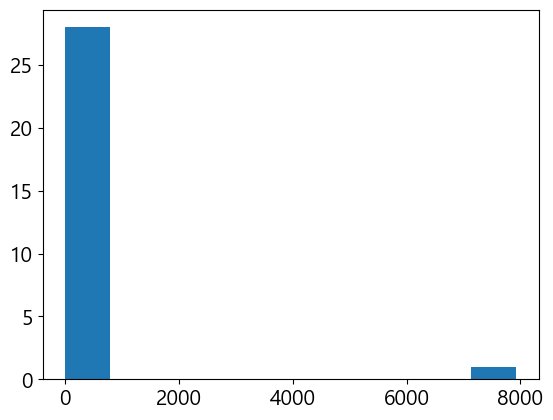

In [ ]:
# null 값 시각화각화
plt.hist(df.isnull().sum())
plt.show()

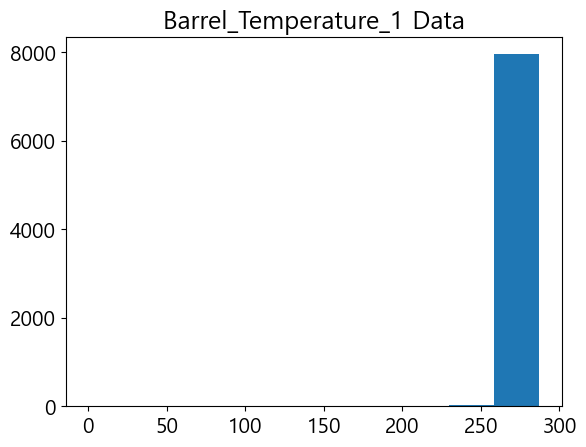

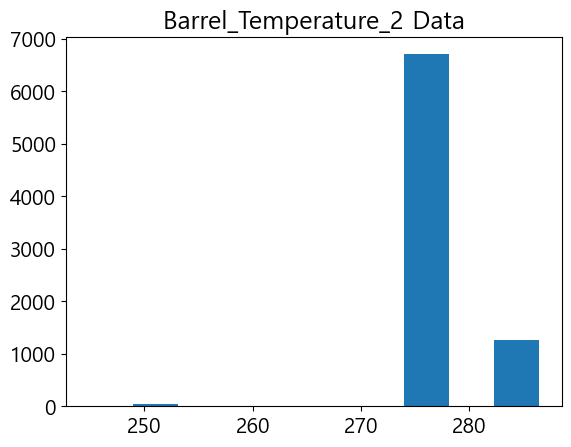

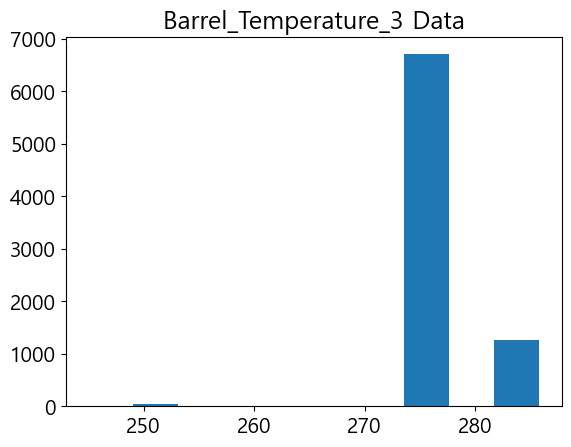

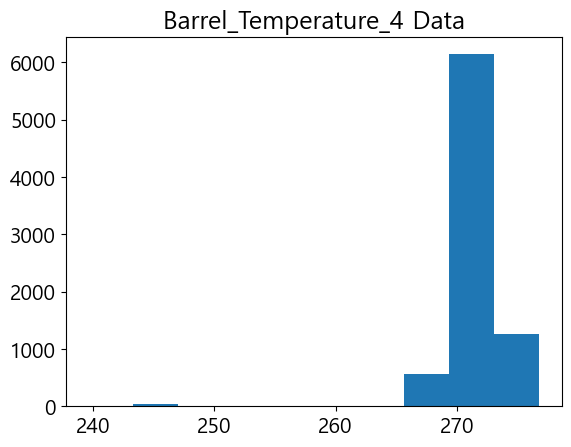

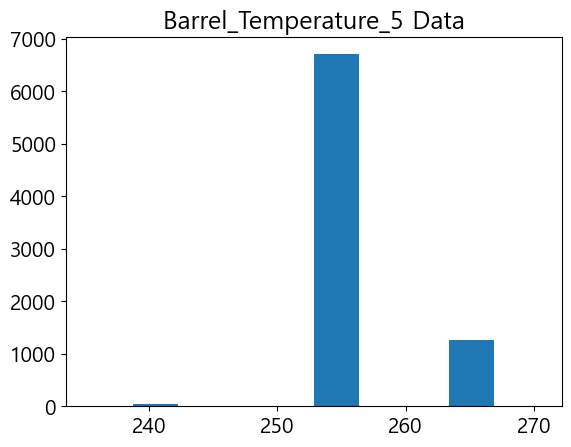

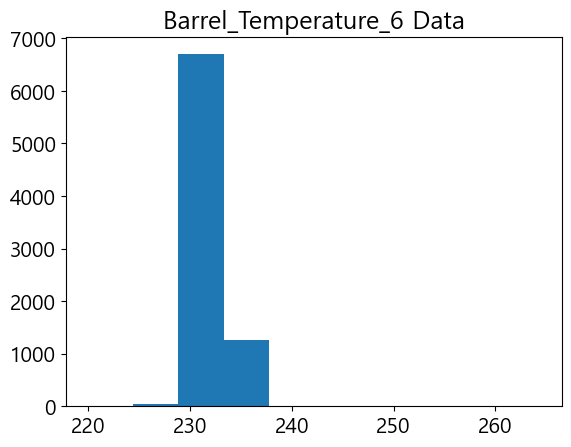

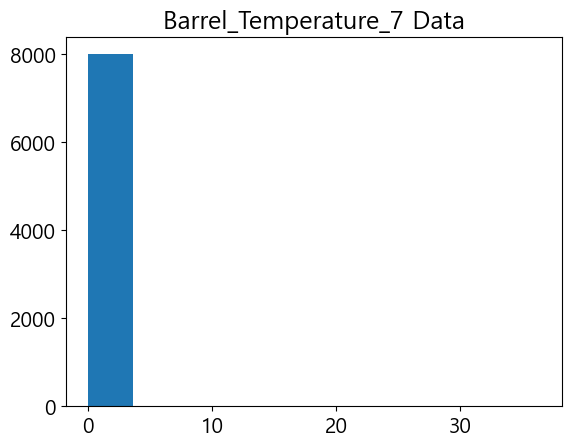

In [7]:
for i in range(1, 8):
    # print(f'Barrel_Temperature_{i} Data')
    # print(df[f'Barrel_Temperature_{i}'].unique(), end='\n\n')
    plt.hist(df[f'Barrel_Temperature_{i}'])
    plt.title(f'Barrel_Temperature_{i} Data')
    plt.show()

In [8]:
print(df['Barrel_Temperature_7'].value_counts())

Barrel_Temperature_7
0.000000     7994
36.400002       2
Name: count, dtype: int64


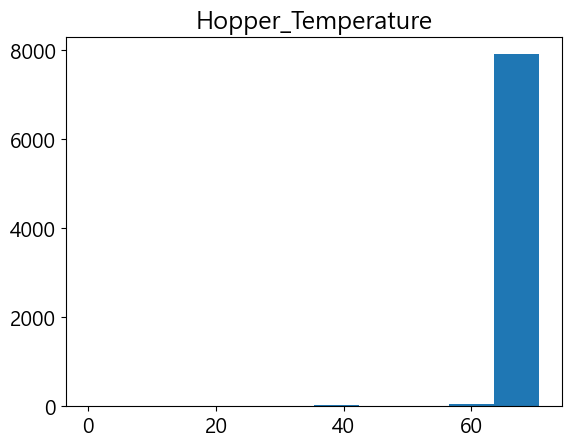

In [9]:
# print(df['Hopper_Temperature'].unique())
plt.hist(df['Hopper_Temperature'])
plt.title('Hopper_Temperature')
plt.show()

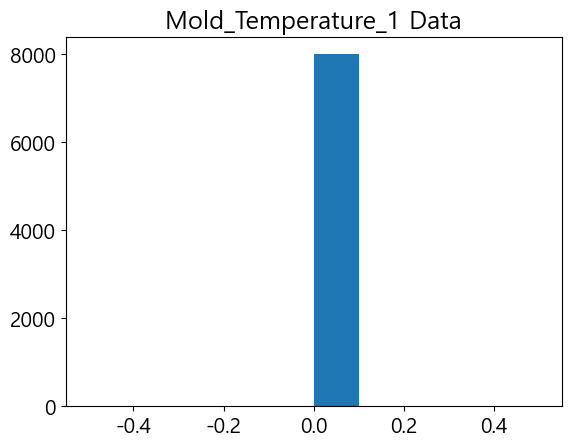

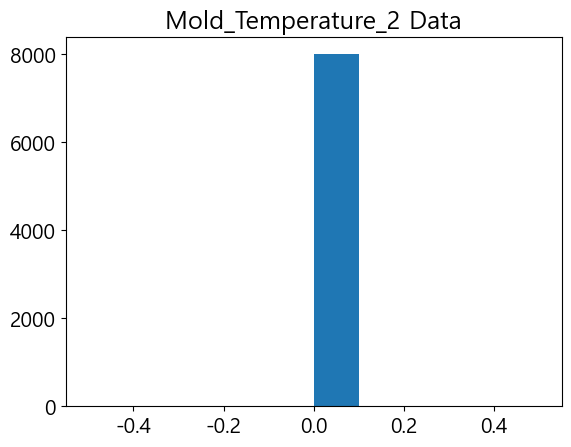

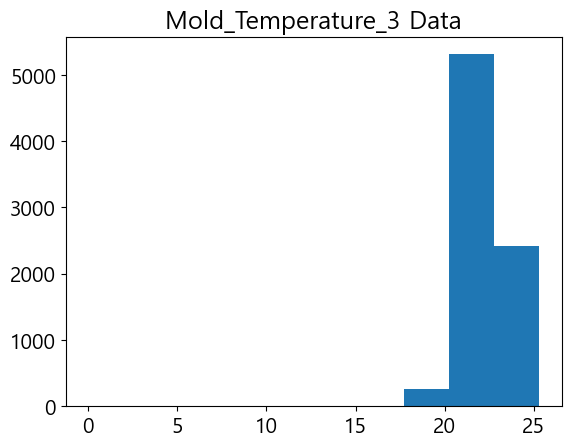

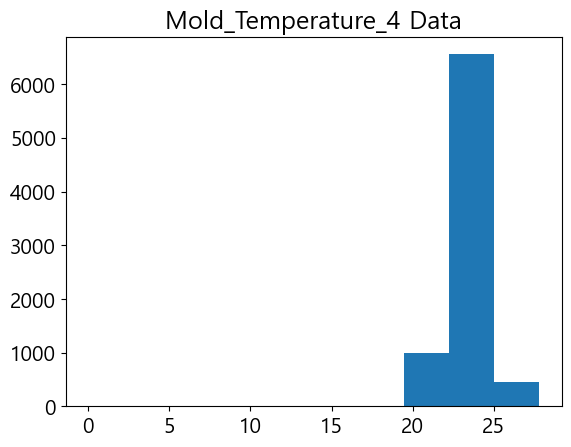

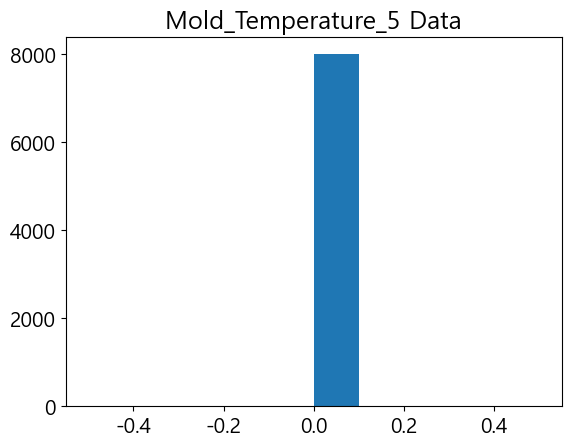

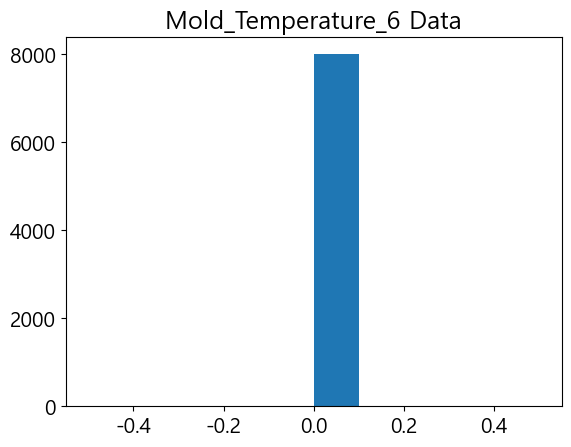

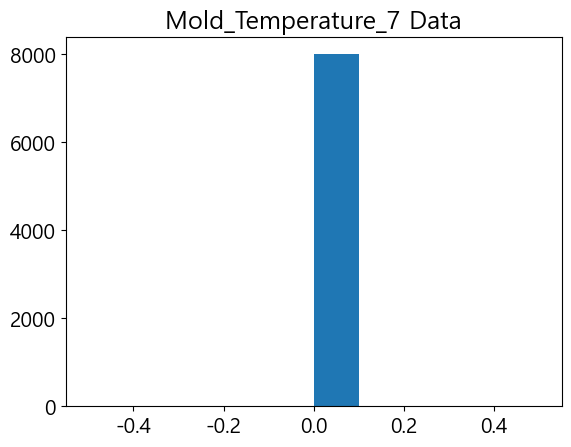

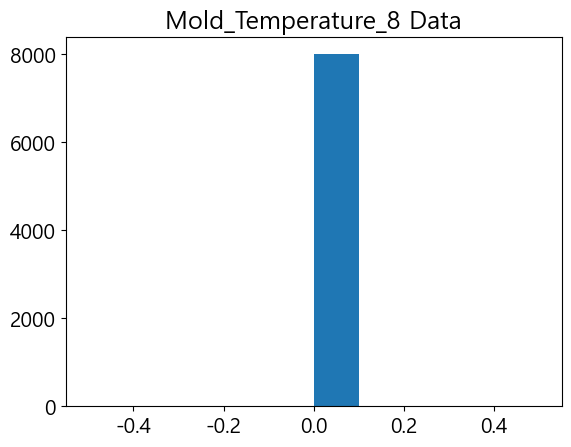

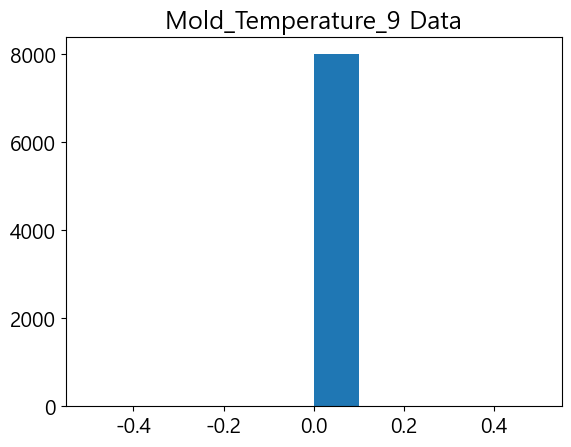

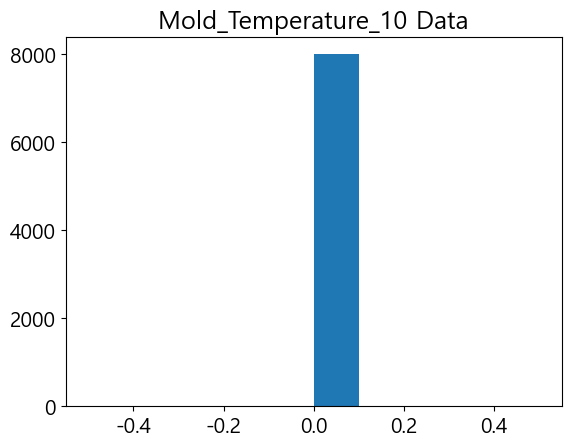

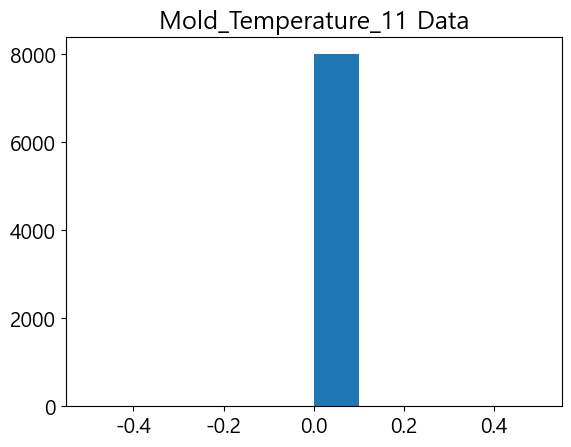

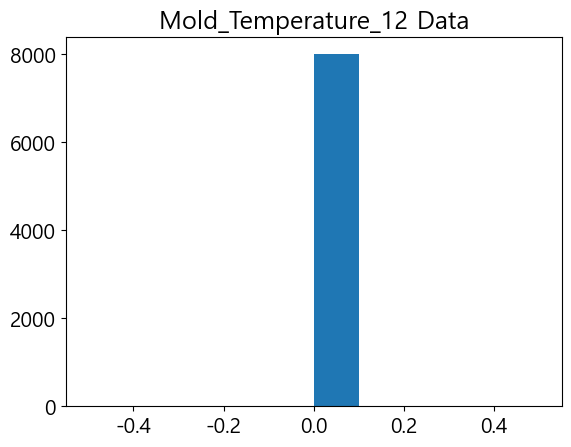

In [10]:
for i in range(1, 13):
    # print(f'Mold_Temperature_{i} Data')
    # print(df[f'Mold_Temperature_{i}'].unique(), end='\n\n')
    plt.hist(df[f'Mold_Temperature_{i}'])
    plt.title(f'Mold_Temperature_{i} Data')
    plt.show()

* ~~Reason 속성은 71개의 데이터 이외에 7925개는 NaN값~~
<br> **Reason 속성은 양품과 불량품을 판별하는데 주요데이터이며 71개는 불량이라는 의미이기에 삭제 불가능**
* Barrel_Temperature_7은 2개의 값 제외하고 나머지는 0
* Mold_Temperature_3, 4를 제외한 다른 데이터들은 전부 0값이기에 제거

**제거해야할 속성 : Barrel_Temperature_7, Mold_Temperature_3, 4를 제외한 나머지**

In [11]:
df = df.drop(columns=[
    'Barrel_Temperature_7',
    'Mold_Temperature_1',
    'Mold_Temperature_2',
    'Mold_Temperature_5',
    'Mold_Temperature_6',
    'Mold_Temperature_7',
    'Mold_Temperature_8',
    'Mold_Temperature_9',
    'Mold_Temperature_10',
    'Mold_Temperature_11',
    'Mold_Temperature_12'
])

In [12]:
len(df.keys())

29

* 전체 44개의 속성중 29개만 남음

### labeled_data의 PassOrFail 속성 값이 비대칭이기에 unlabeled_data로 데이터량 늘리기

In [16]:
unlabel_df = pd.read_csv("dataset/unlabeled_data.csv", index_col=0, encoding="utf-8")
unlabel_df

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f9136166e37704af878240e,2020-01-02 00:59:22,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,3.18,...,0.0,0.0,0,0,0,0,0,0,0,0
1,5f9136166e37704af878240f,2020-01-02 01:01:01,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.29,...,0.0,0.0,0,0,0,0,0,0,0,0
2,5f9136166e37704af8782410,2020-01-02 01:01:01,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,16.29,...,0.0,0.0,0,0,0,0,0,0,0,0
3,5f9136166e37704af8782411,2020-01-02 01:02:24,2020-01-02 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,11,16.28,...,0.0,0.0,0,0,0,0,0,0,0,0
4,5f9136166e37704af8782412,2020-01-02 01:02:24,2020-01-02 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,11,16.28,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,5f926a806e37704af88455fb,2020-10-23 05:30:20,2020-10-23 오전 12:00:00,13,84721G9000,IK PNL C/PAD MAIN LHD,S10,3300TON-우진,0,12.09,...,0.0,0.0,0,0,0,0,0,0,0,0
795311,5f926a806e37704af88455fc,2020-10-23 05:30:24,2020-10-23 오전 12:00:00,10,86141S8900,LX2 W/S SIDE MLD'G RH(RHD),S12,650톤-우진,0,11.47,...,20.2,23.6,0,0,0,0,0,0,0,0
795312,5f926ab26e37704af88455fe,2020-10-23 05:31:13,2020-10-23 오전 12:00:00,1,87275Q5000,"SP2 CVR ROOF RACK CTR, LH",S01,1800TON-우진,2,16.34,...,0.0,0.0,0,0,0,0,0,0,0,0
795313,5f926ab26e37704af88455ff,2020-10-23 05:31:13,2020-10-23 오전 12:00:00,2,87285Q5000,"SP2 CVR ROOF RACK CTR, RH",S01,1800TON-우진,2,16.34,...,0.0,0.0,0,0,0,0,0,0,0,0


In [17]:
unlabel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795315 entries, 0 to 795314
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   _id                       795315 non-null  object 
 1   TimeStamp                 795315 non-null  object 
 2   PART_FACT_PLAN_DATE       795315 non-null  object 
 3   PART_FACT_SERIAL          795315 non-null  int64  
 4   PART_NO                   795315 non-null  object 
 5   PART_NAME                 795315 non-null  object 
 6   EQUIP_CD                  795315 non-null  object 
 7   EQUIP_NAME                795315 non-null  object 
 8   ERR_FACT_QTY              795315 non-null  int64  
 9   Injection_Time            795315 non-null  float64
 10  Filling_Time              795315 non-null  float64
 11  Plasticizing_Time         795315 non-null  float64
 12  Cycle_Time                795315 non-null  float64
 13  Clamp_Close_Time          795315 non-null  float6

### labeled_data와 속성 맞추기
**제거해야하는 속성**
* _id
* TimeStamp
* PART_FACT_PLAN_DATE
* PART_FACT_SERIAL
* PART_NO
* EQUIP_CD
* Barrel_Temperature_7
* Mold_Temperature_1
* Mold_Temperature_2
* Mold_Temperature_5
* Mold_Temperature_6
* Mold_Temperature_7
* Mold_Temperature_8
* Mold_Temperature_9
* Mold_Temperature_10
* Mold_Temperature_11
* Mold_Temperature_12

<br>**Reason 속성은 unlabeled_data에 없기에 ERR_FACT_QTY를 통해 생성 예정**

In [18]:
unlabel_df = unlabel_df.drop(columns=['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NO', 'EQUIP_CD', 'Barrel_Temperature_7', 'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5', 'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11', 'Mold_Temperature_12'])
unlabel_df

,PART_NAME,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,11,3.18,2.66,13.14,0.00,12.30,9.9,10.0,...,0.0,0.0,261.8,270.4,271.1,273.5,260.3,0.0,0.0,0.0
1,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,11,16.29,2.78,13.72,0.00,12.50,9.0,10.0,...,48.3,0.0,258.4,270.7,271.0,274.8,262.3,0.0,0.0,0.0
2,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,11,16.29,2.78,13.72,0.00,12.50,9.0,10.0,...,48.3,0.0,258.4,270.7,271.0,274.8,262.3,0.0,0.0,0.0
3,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,11,16.28,2.78,12.74,81.38,12.77,8.7,10.0,...,48.8,0.0,258.6,270.3,270.5,274.4,262.7,0.0,0.0,0.0
4,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,11,16.28,2.78,12.74,81.38,12.77,8.7,10.0,...,48.8,0.0,258.6,270.3,270.5,274.4,262.7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,IK PNL C/PAD MAIN LHD,3300TON-우진,0,12.09,4.58,14.40,83.00,11.38,8.7,18.0,...,49.3,0.0,218.9,231.6,231.2,224.6,211.3,63.0,0.0,0.0
795311,LX2 W/S SIDE MLD'G RH(RHD),650톤-우진,0,11.47,3.36,20.01,64.28,6.04,655.0,0.0,...,13.7,245.5,250.1,250.1,245.2,240.0,225.2,39.0,20.2,23.6
795312,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,2,16.34,3.03,10.67,66.82,5.85,11.7,10.0,...,26.9,0.0,264.1,270.4,270.1,270.0,265.6,0.0,0.0,0.0
795313,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,2,16.34,3.03,10.67,66.82,5.85,11.7,10.0,...,26.9,0.0,264.1,270.4,270.1,270.0,265.6,0.0,0.0,0.0


In [19]:
unlabel_df.describe()

,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,...,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000,795315.000000
mean,13.862124,9.454754,3.897417,11.230021,58.030807,5.575053,215.040085,10.884156,63.556493,561.095939,...,27.840412,88.723012,262.881242,266.185574,264.326963,257.662214,241.974084,38.443004,7.672545,8.939656
std,26.549459,5.569126,1.645200,7.619902,16.916262,1.913712,296.933993,19.045073,40.963720,369.229806,...,28.318217,124.626114,13.272051,11.712932,11.421668,12.901731,15.345906,27.358290,11.476776,13.608882
min,0.000000,0.130000,0.000000,0.200000,0.000000,2.110000,0.000000,0.000000,31.270000,0.000000,...,0.000000,0.000000,189.400000,189.000000,179.400000,179.600000,167.800000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,2.950000,2.900000,39.100000,3.400000,11.800000,0.000000,40.500000,485.600000,...,0.000000,0.000000,260.400000,264.900000,264.800000,254.800000,230.100000,0.000000,0.000000,0.000000
50%,5.000000,9.520000,3.350000,10.950000,64.420000,6.080000,18.200000,10.000000,59.900000,522.500000,...,22.100000,0.000000,264.800000,269.900000,269.800000,259.900000,239.900000,56.700000,0.000000,0.000000
75%,13.000000,16.290000,5.000000,16.770000,67.590000,6.720000,653.620000,18.200000,63.420000,883.300000,...,49.300000,245.300000,265.900000,270.400000,270.100000,269.800000,259.800000,61.600000,20.700000,23.300000
max,353.000000,29.100000,29.100000,468.200000,648.390000,30.100000,655.330000,655.340000,392.900000,1901.000000,...,165.200000,990.200000,340.300000,290.300000,290.100000,290.200000,276.800000,75.100000,39.200000,51.100000


In [21]:
np.median(unlabel_df['ERR_FACT_QTY'])

5.0

In [ ]:
unlabel_df['ERR_FACT_QTY'] = unlabel_df['ERR_FACT_QTY'].replace(unlabel_df['ERR_FACT_QTY'][unlabel_df[unlabel_df['ERR_FACT_QTY'] > 5].index.to_numpy()].to_numpy(), 'N').replace(unlabel_df['ERR_FACT_QTY'][unlabel_df[unlabel_df['ERR_FACT_QTY'] <= 5].index.to_numpy()].to_numpy(), 'Y')

In [13]:
unlabel_df = pd.read_csv("dataset/new_labeled_data.csv", index_col=0, encoding="utf-8")
unlabel_df

,PART_NAME,EQUIP_NAME,ERR_FACT_QTY,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,N,3.18,2.66,13.14,0.00,12.30,9.9,10.0,...,0.0,0.0,261.8,270.4,271.1,273.5,260.3,0.0,0.0,0.0
1,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,N,16.29,2.78,13.72,0.00,12.50,9.0,10.0,...,48.3,0.0,258.4,270.7,271.0,274.8,262.3,0.0,0.0,0.0
2,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,N,16.29,2.78,13.72,0.00,12.50,9.0,10.0,...,48.3,0.0,258.4,270.7,271.0,274.8,262.3,0.0,0.0,0.0
3,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,N,16.28,2.78,12.74,81.38,12.77,8.7,10.0,...,48.8,0.0,258.6,270.3,270.5,274.4,262.7,0.0,0.0,0.0
4,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,N,16.28,2.78,12.74,81.38,12.77,8.7,10.0,...,48.8,0.0,258.6,270.3,270.5,274.4,262.7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,IK PNL C/PAD MAIN LHD,3300TON-우진,Y,12.09,4.58,14.40,83.00,11.38,8.7,18.0,...,49.3,0.0,218.9,231.6,231.2,224.6,211.3,63.0,0.0,0.0
795311,LX2 W/S SIDE MLD'G RH(RHD),650톤-우진,Y,11.47,3.36,20.01,64.28,6.04,655.0,0.0,...,13.7,245.5,250.1,250.1,245.2,240.0,225.2,39.0,20.2,23.6
795312,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,Y,16.34,3.03,10.67,66.82,5.85,11.7,10.0,...,26.9,0.0,264.1,270.4,270.1,270.0,265.6,0.0,0.0,0.0
795313,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,Y,16.34,3.03,10.67,66.82,5.85,11.7,10.0,...,26.9,0.0,264.1,270.4,270.1,270.0,265.6,0.0,0.0,0.0


In [ ]:
unlabel_df = unlabel_df.rename(columns={'ERR_FACT_QTY' : 'PassOrFail'})
unlabel_df

,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,N,3.18,2.66,13.14,0.00,12.30,9.9,10.0,...,0.0,0.0,261.8,270.4,271.1,273.5,260.3,0.0,0.0,0.0
1,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,N,16.29,2.78,13.72,0.00,12.50,9.0,10.0,...,48.3,0.0,258.4,270.7,271.0,274.8,262.3,0.0,0.0,0.0
2,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,N,16.29,2.78,13.72,0.00,12.50,9.0,10.0,...,48.3,0.0,258.4,270.7,271.0,274.8,262.3,0.0,0.0,0.0
3,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,N,16.28,2.78,12.74,81.38,12.77,8.7,10.0,...,48.8,0.0,258.6,270.3,270.5,274.4,262.7,0.0,0.0,0.0
4,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,N,16.28,2.78,12.74,81.38,12.77,8.7,10.0,...,48.8,0.0,258.6,270.3,270.5,274.4,262.7,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,IK PNL C/PAD MAIN LHD,3300TON-우진,Y,12.09,4.58,14.40,83.00,11.38,8.7,18.0,...,49.3,0.0,218.9,231.6,231.2,224.6,211.3,63.0,0.0,0.0
795311,LX2 W/S SIDE MLD'G RH(RHD),650톤-우진,Y,11.47,3.36,20.01,64.28,6.04,655.0,0.0,...,13.7,245.5,250.1,250.1,245.2,240.0,225.2,39.0,20.2,23.6
795312,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,Y,16.34,3.03,10.67,66.82,5.85,11.7,10.0,...,26.9,0.0,264.1,270.4,270.1,270.0,265.6,0.0,0.0,0.0
795313,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,Y,16.34,3.03,10.67,66.82,5.85,11.7,10.0,...,26.9,0.0,264.1,270.4,270.1,270.0,265.6,0.0,0.0,0.0


### Reason 생성

In [35]:
df['Reason'].value_counts()

Reason
가스        35
초기허용불량    20
미성형       16
Name: count, dtype: int64

In [38]:
df = df.fillna('양품')
df

,PART_NAME,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,양품,9.59,4.47,16.920000,59.520000,7.13,653.409973,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.500000
1,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,양품,9.60,4.48,16.910000,59.580002,7.13,653.409973,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,양품,9.60,4.48,16.910000,59.580002,7.13,653.409973,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,양품,9.59,4.48,16.910000,59.560001,7.13,653.419983,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
4,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,양품,9.59,4.48,16.910000,59.560001,7.13,653.419983,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,양품,9.60,4.48,16.620001,59.560001,7.11,653.429993,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
7992,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,양품,9.60,4.48,16.650000,59.560001,7.11,653.429993,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000
7993,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,양품,9.60,4.48,16.650000,59.560001,7.11,653.429993,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000
7994,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,양품,9.60,4.48,16.629999,59.580002,7.11,653.429993,...,59.900002,276.100006,275.799988,275.000000,271.299988,255.100006,230.199997,65.199997,21.000000,22.299999


In [ ]:
df = df.drop(columns='Reason')
df

,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.59,4.47,16.920000,59.520000,7.13,653.409973,0.0,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.500000
1,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
4,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.60,4.48,16.620001,59.560001,7.11,653.429993,0.0,...,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
7992,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000
7993,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,...,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000
7994,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.60,4.48,16.629999,59.580002,7.11,653.429993,0.0,...,59.900002,276.100006,275.799988,275.000000,271.299988,255.100006,230.199997,65.199997,21.000000,22.299999


In [91]:
new_df = pd.concat([df, unlabel_df], axis=0)
new_df

,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
1,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
4,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,IK PNL C/PAD MAIN LHD,3300TON-우진,Y,12.09,4.58,14.40,83.000000,11.38,8.700000,18.0,...,49.300000,0.000000,218.900000,231.600000,231.200000,224.600000,211.300000,63.000000,0.000000,0.0
795311,LX2 W/S SIDE MLD'G RH(RHD),650톤-우진,Y,11.47,3.36,20.01,64.280000,6.04,655.000000,0.0,...,13.700000,245.500000,250.100000,250.100000,245.200000,240.000000,225.200000,39.000000,20.200000,23.6
795312,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,Y,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,...,26.900000,0.000000,264.100000,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0
795313,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,Y,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,...,26.900000,0.000000,264.100000,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0


In [20]:
new_df = pd.read_csv("dataset/final_labeled_data.csv", index_col=0, encoding="utf-8")
new_df

,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
1,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
4,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,IK PNL C/PAD MAIN LHD,3300TON-우진,Y,12.09,4.58,14.40,83.000000,11.38,8.700000,18.0,...,49.300000,0.000000,218.900000,231.600000,231.200000,224.600000,211.300000,63.000000,0.000000,0.0
795311,LX2 W/S SIDE MLD'G RH(RHD),650톤-우진,Y,11.47,3.36,20.01,64.280000,6.04,655.000000,0.0,...,13.700000,245.500000,250.100000,250.100000,245.200000,240.000000,225.200000,39.000000,20.200000,23.6
795312,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,Y,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,...,26.900000,0.000000,264.100000,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0
795313,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,Y,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,...,26.900000,0.000000,264.100000,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0


In [21]:
outlier_clean_data = pd.read_csv("dataset/outlier_clear_final_df.csv", index_col=0, encoding="utf-8")
outlier_clean_data

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,...,59.299999,276.500000,274.25,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
1,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,...,59.299999,276.200012,274.25,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,...,59.299999,276.200012,274.25,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,...,59.299999,276.500000,274.25,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
4,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,...,59.299999,276.500000,274.25,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,12.09,4.58,14.40,83.000000,11.38,8.700000,18.0,97.900000,1479.85000,41.600000,...,49.300000,0.000000,252.25,256.650000,257.100000,232.300000,211.300000,63.000000,0.000000,0.0
795311,11.47,3.36,20.01,64.280000,6.04,655.000000,0.0,59.820000,69.64000,64.600000,...,13.700000,245.500000,252.25,256.650000,257.100000,240.000000,225.200000,39.000000,20.200000,23.6
795312,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,59.900000,883.80000,22.400000,...,26.900000,0.000000,264.10,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0
795313,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,59.900000,883.80000,22.400000,...,26.900000,0.000000,264.10,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0


In [22]:
outlier_clean_data = pd.concat([new_df.iloc[:, :3], outlier_clean_data], axis=1)
outlier_clean_data

,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,...,59.299999,276.500000,274.25,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
1,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,274.25,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,274.25,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,274.25,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
4,CN7 W/S SIDE MLD'G RH,650톤-우진2호기,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,274.25,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795310,IK PNL C/PAD MAIN LHD,3300TON-우진,Y,12.09,4.58,14.40,83.000000,11.38,8.700000,18.0,...,49.300000,0.000000,252.25,256.650000,257.100000,232.300000,211.300000,63.000000,0.000000,0.0
795311,LX2 W/S SIDE MLD'G RH(RHD),650톤-우진,Y,11.47,3.36,20.01,64.280000,6.04,655.000000,0.0,...,13.700000,245.500000,252.25,256.650000,257.100000,240.000000,225.200000,39.000000,20.200000,23.6
795312,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,Y,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,...,26.900000,0.000000,264.10,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0
795313,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,Y,16.34,3.03,10.67,66.820000,5.85,11.700000,10.0,...,26.900000,0.000000,264.10,270.400000,270.100000,270.000000,265.600000,0.000000,0.000000,0.0


In [23]:
outlier_clean_data['EQUIP_NAME'].unique()

array(['650톤-우진2호기', '1800TON-우진', '650톤-우진', '850TON-LS 1호기',
       '550TON-도시바', '3300TON-우진', '850TON-미쓰비시', '240TON-우진',
       '650TON-LS', '2000TON-동신', '850TON-LS 2호기', '수직사출기', '450TON-LS'],
      dtype=object)

In [24]:
wojin2_650ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '650톤-우진2호기']
wojin_1800ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '1800TON-우진']
wojin_650ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '650톤-우진']
ls1_850ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '850TON-LS 1호기']
dosiba_550ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '550TON-도시바']
wojin_3300ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '3300TON-우진']
misbici_850ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '850TON-미쓰비시']
wojin_240ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '240TON-우진']
ls_650ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '650TON-LS']
dongsin_2000ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '2000TON-동신']
ls2_850ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '850TON-LS 2호기']
perpendicular = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '수직사출기']
ls_450ton = outlier_clean_data[outlier_clean_data['EQUIP_NAME'] == '450TON-LS']

In [25]:
print(len(wojin2_650ton.index))
print(len(wojin_1800ton.index))
print(len(wojin_650ton.index))
print(len(ls1_850ton.index))
print(len(dosiba_550ton.index))
print(len(wojin_3300ton.index))
print(len(misbici_850ton.index))
print(len(wojin_240ton.index))
print(len(ls_650ton.index))
print(len(dongsin_2000ton.index))
print(len(ls2_850ton.index))
print(len(perpendicular.index))
print(len(ls_450ton.index))

90962
278433
105362
21415
76818
50266
50794
71076
507
25692
4987
20616
6383


In [26]:
print(wojin2_650ton["PART_NAME"].value_counts())
print(wojin_1800ton["PART_NAME"].value_counts())
print(wojin_650ton["PART_NAME"].value_counts())
print(ls1_850ton["PART_NAME"].value_counts())
print(dosiba_550ton["PART_NAME"].value_counts())
print(wojin_3300ton["PART_NAME"].value_counts())
print(misbici_850ton["PART_NAME"].value_counts())
print(wojin_240ton["PART_NAME"].value_counts())
print(ls_650ton["PART_NAME"].value_counts())
print(dongsin_2000ton["PART_NAME"].value_counts())
print(ls2_850ton["PART_NAME"].value_counts())
print(perpendicular["PART_NAME"].value_counts())
print(ls_450ton["PART_NAME"].value_counts())

PART_NAME
CN7 W/S SIDE MLD'G LH    22698
RG3 MOLD'G W/SHLD, LH    19433
CN7 W/S SIDE MLD'G RH    19277
RG3 MOLD'G W/SHLD, RH    17764
BC3 MOLD'G W/SHLD, LH     5223
JX1 W/S SIDE MLD'G LH     3127
BC3 MOLD'G W/SHLD, RH     2647
JX1 W/S SIDE MLD'G RH      793
Name: count, dtype: int64
PART_NAME
SP2 CVR ROOF RACK CTR, LH       118071
SP2 CVR ROOF RACK CTR, RH       114979
SK3 SIDE RAIL-ROOF RACK, RH      14676
SK3 SIDE RAIL-ROOF RACK, LH      14372
BR2 SIDE RAIL-ROOF RACK,LH        5624
BR2 SIDE RAIL-ROOF RACK,RH        2617
TM SIDE STEP TRIM RH              1998
DM AL CVR LH                      1221
SIDE-RR BUMPER SINGLE             1049
TM SIDE STEP TRIM LH               764
DM SIDE STEP TRIM LH               554
QL SIDE STEP TRIM RH               486
QL SIDE STEP TRIM LH               485
DM SIDE STEP TRIM RH               463
ON SIDE STEP PLATE, RH             282
ON SIDE STEP PLATE, LH             280
FOR YP SIDE STEP TRIM LH(사출)       169
FOR YP SIDE STEP TRIM RH(사출)       169
TL S

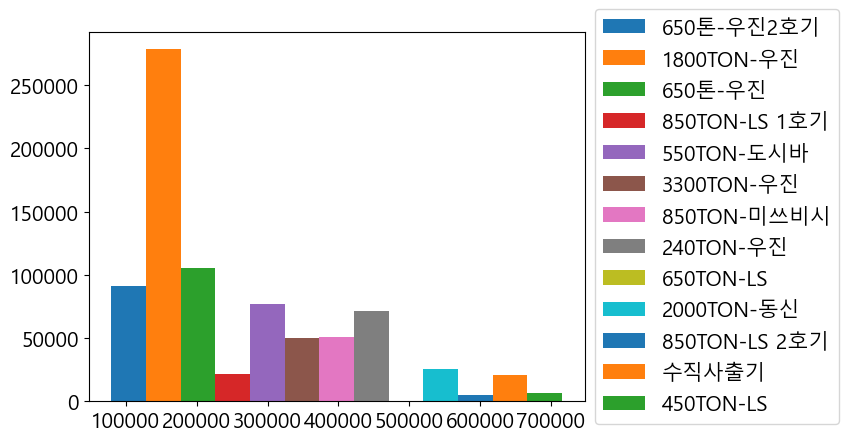

In [26]:
plt.hist([
    wojin2_650ton["PART_NAME"].index,
    wojin_1800ton["PART_NAME"].index,
    wojin_650ton["PART_NAME"].index,
    ls1_850ton["PART_NAME"].index,
    dosiba_550ton["PART_NAME"].index,
    wojin_3300ton["PART_NAME"].index,
    misbici_850ton["PART_NAME"].index,
    wojin_240ton["PART_NAME"].index,
    ls_650ton["PART_NAME"].index,
    dongsin_2000ton["PART_NAME"].index,
    ls2_850ton["PART_NAME"].index,
    perpendicular["PART_NAME"].index,
    ls_450ton["PART_NAME"].index
], bins=1, label=new_df['EQUIP_NAME'].unique())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

PART_NAME
CN7 W/S SIDE MLD'G LH    22698
RG3 MOLD'G W/SHLD, LH    19433
CN7 W/S SIDE MLD'G RH    19277
RG3 MOLD'G W/SHLD, RH    17764
BC3 MOLD'G W/SHLD, LH     5223
JX1 W/S SIDE MLD'G LH     3127
BC3 MOLD'G W/SHLD, RH     2647
JX1 W/S SIDE MLD'G RH      793
Name: count, dtype: int64
PART_NAME
SP2 CVR ROOF RACK CTR, LH       118071
SP2 CVR ROOF RACK CTR, RH       114979
SK3 SIDE RAIL-ROOF RACK, RH      14676
SK3 SIDE RAIL-ROOF RACK, LH      14372
BR2 SIDE RAIL-ROOF RACK,LH        5624
BR2 SIDE RAIL-ROOF RACK,RH        2617
TM SIDE STEP TRIM RH              1998
DM AL CVR LH                      1221
SIDE-RR BUMPER SINGLE             1049
TM SIDE STEP TRIM LH               764
DM SIDE STEP TRIM LH               554
QL SIDE STEP TRIM RH               486
QL SIDE STEP TRIM LH               485
DM SIDE STEP TRIM RH               463
ON SIDE STEP PLATE, RH             282
ON SIDE STEP PLATE, LH             280
FOR YP SIDE STEP TRIM LH(사출)       169
FOR YP SIDE STEP TRIM RH(사출)       169
TL S

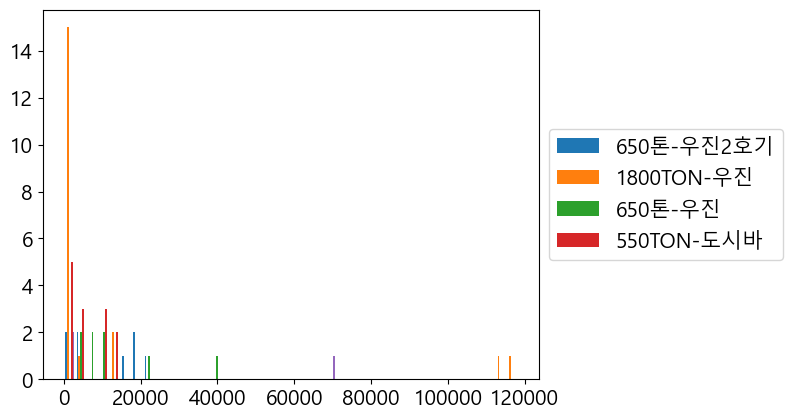

In [ ]:
# 제거해야하는 행 == [850TON-LS 1호기, 3300TON-우진, 850TON-미쓰비시, 650TON-LS, 2000TON-동신, 850TON-LS 2호기, 수직사출기, 450TON-LS]
print(wojin2_650ton["PART_NAME"].value_counts())
print(wojin_1800ton["PART_NAME"].value_counts())
print(wojin_650ton["PART_NAME"].value_counts())
print(dosiba_550ton["PART_NAME"].value_counts())
# print(wojin_240ton["PART_NAME"].value_counts()) 

plt.hist([
    wojin2_650ton["PART_NAME"].value_counts(),
    wojin_1800ton["PART_NAME"].value_counts(),
    wojin_650ton["PART_NAME"].value_counts(),
    dosiba_550ton["PART_NAME"].value_counts(),
    # wojin_240ton["PART_NAME"].value_counts(),
], bins=40, label=['650톤-우진2호기', '1800TON-우진', '650톤-우진', '550TON-도시바'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 데이터 비율 차이가 큰 행은 전부 제거

In [33]:
def row_drop(df, col, row1, row2):
    return pd.concat([df[df[col] == row1], df[df[col] == row2]], axis=0)



In [34]:
wojin2_650ton = pd.concat([row_drop(wojin2_650ton, "PART_NAME", "CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH"), row_drop(wojin2_650ton, "PART_NAME", "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH")], axis=0)
display(wojin2_650ton)

wojin_1800ton = row_drop(wojin_1800ton, "PART_NAME", "SP2 CVR ROOF RACK CTR, LH", "SP2 CVR ROOF RACK CTR, RH")
display(wojin_1800ton)

wojin_650ton = row_drop(wojin_650ton, "PART_NAME", "LX2 W/S SIDE MLD'G LH", "LX2 W/S SIDE MLD'G RH")
display(wojin_650ton)

dosiba_550ton = pd.concat([row_drop(dosiba_550ton, "PART_NAME", "CD SIDE MOLDING LH", "CD SIDE MOLDING RH"), row_drop(dosiba_550ton, "PART_NAME", "PD W/S SIDE MLD'G LH", "PD W/S SIDE MLD'G RH")], axis=0)
display(dosiba_550ton)

,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,274.25,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,274.25,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
6,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.58,4.46,16.90,59.580002,7.13,653.409973,0.0,...,59.400002,276.299988,274.25,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.6
8,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.58,4.46,16.92,59.560001,7.13,653.409973,0.0,...,59.299999,275.799988,274.25,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.6
10,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.57,4.45,16.91,59.520000,7.14,653.409973,0.0,...,59.099998,275.700012,274.25,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795288,"RG3 MOLD'G W/SHLD, RH",650톤-우진2호기,Y,1.06,0.94,12.88,61.780000,6.80,654.250000,0.0,...,60.800000,285.600000,274.25,278.650000,274.500000,265.500000,235.500000,64.900000,23.200000,24.7
795293,"RG3 MOLD'G W/SHLD, RH",650톤-우진2호기,Y,1.06,0.94,12.88,61.780000,6.80,654.250000,0.0,...,61.000000,285.800000,274.25,278.650000,274.100000,265.500000,234.800000,65.000000,23.200000,24.7
795299,"RG3 MOLD'G W/SHLD, RH",650톤-우진2호기,Y,1.06,0.94,12.93,61.780000,6.80,654.240000,0.0,...,61.200000,286.900000,274.25,278.650000,274.500000,266.000000,234.700000,64.900000,23.200000,24.7
795304,"RG3 MOLD'G W/SHLD, RH",650톤-우진2호기,Y,1.06,0.94,12.90,61.780000,6.80,654.240000,0.0,...,61.500000,286.500000,274.25,278.650000,275.700000,265.000000,235.100000,64.900000,23.300000,24.7


,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
1,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,N,16.29,2.78,13.72,0.00,11.70,9.0,10.0,...,48.3,0.0,258.4,270.7,271.0,274.8,262.3,0.0,0.0,0.0
3,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,N,16.28,2.78,12.74,81.38,11.70,8.7,10.0,...,48.8,0.0,258.6,270.3,270.5,274.4,262.7,0.0,0.0,0.0
5,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,N,16.29,2.78,12.13,81.44,11.70,9.3,10.0,...,50.0,0.0,261.8,270.1,270.3,273.8,262.1,0.0,0.0,0.0
7,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,N,16.30,2.79,11.84,81.10,11.70,10.0,10.0,...,50.4,0.0,263.1,270.0,270.7,272.5,261.1,0.0,0.0,0.0
9,"SP2 CVR ROOF RACK CTR, LH",1800TON-우진,N,16.30,2.79,11.73,80.93,11.70,10.2,10.0,...,50.4,0.0,260.8,270.1,270.8,271.1,260.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795291,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,Y,16.33,3.03,10.70,66.88,5.87,11.7,10.0,...,26.6,0.0,266.9,269.6,270.2,270.6,265.2,0.0,0.0,0.0
795297,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,Y,16.33,3.02,10.70,66.92,5.87,11.7,10.0,...,26.8,0.0,267.1,270.0,269.6,270.1,265.6,0.0,0.0,0.0
795302,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,Y,16.34,3.03,10.71,66.88,5.81,11.6,10.0,...,27.0,0.0,265.4,270.0,270.3,270.0,265.4,0.0,0.0,0.0
795307,"SP2 CVR ROOF RACK CTR, RH",1800TON-우진,Y,16.34,3.03,10.68,66.82,5.80,11.7,10.0,...,27.0,0.0,263.3,270.2,269.8,269.9,265.3,0.0,0.0,0.0


,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
37338,LX2 W/S SIDE MLD'G LH,650톤-우진,N,6.00,6.00,3.10,39.10,3.40,17.40,17.5,...,0.0,0.0,252.25,259.9,260.0,244.8,225.0,54.9,0.0,0.0
37339,LX2 W/S SIDE MLD'G LH,650톤-우진,N,6.00,6.00,3.10,39.10,3.40,17.50,17.6,...,0.0,0.0,252.25,259.9,260.0,244.7,225.1,54.9,0.0,0.0
37342,LX2 W/S SIDE MLD'G LH,650톤-우진,N,6.00,6.00,3.10,39.10,3.40,17.40,17.5,...,0.0,0.0,252.25,259.9,260.0,244.7,225.2,54.9,0.0,0.0
37343,LX2 W/S SIDE MLD'G LH,650톤-우진,N,6.00,6.00,3.20,39.10,3.40,17.40,17.5,...,0.0,0.0,252.25,260.0,260.1,244.8,225.0,55.0,0.0,0.0
37344,LX2 W/S SIDE MLD'G LH,650톤-우진,N,6.00,6.00,3.10,39.10,3.40,17.50,17.5,...,0.0,0.0,252.25,260.0,260.1,244.9,224.9,55.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640270,LX2 W/S SIDE MLD'G RH,650톤-우진,N,9.61,4.50,17.05,64.50,7.10,653.42,0.0,...,60.2,271.2,274.25,275.0,269.4,255.3,229.6,71.8,28.3,30.0
640526,LX2 W/S SIDE MLD'G RH,650톤-우진,N,9.60,4.48,17.04,64.50,7.10,653.43,0.0,...,60.1,271.4,274.25,274.7,270.3,254.7,230.0,72.1,28.4,30.1
640762,LX2 W/S SIDE MLD'G RH,650톤-우진,N,9.63,4.52,17.07,64.56,7.09,653.43,0.0,...,60.4,271.3,274.25,274.5,271.1,254.7,230.0,72.5,28.7,30.4
641380,LX2 W/S SIDE MLD'G RH,650톤-우진,N,9.59,4.48,17.04,64.50,7.11,653.43,0.0,...,60.2,271.3,274.25,275.0,271.3,254.5,230.1,72.2,29.8,32.1


,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
1520,CD SIDE MOLDING LH,550TON-도시바,Y,6.0,6.0,3.1,39.3,3.4,17.5,17.5,...,0.0,0.0,252.25,259.9,259.9,245.2,224.9,54.8,0.0,0.0
1521,CD SIDE MOLDING LH,550TON-도시바,Y,6.0,6.0,3.1,39.3,3.4,17.4,17.4,...,0.0,0.0,252.25,259.9,259.8,245.2,224.9,54.8,0.0,0.0
1522,CD SIDE MOLDING LH,550TON-도시바,Y,6.0,6.0,3.1,39.3,3.4,17.4,17.5,...,0.0,0.0,252.25,259.9,259.8,245.2,225.0,54.8,0.0,0.0
1523,CD SIDE MOLDING LH,550TON-도시바,Y,6.0,6.0,3.1,39.3,3.4,17.5,17.5,...,0.0,0.0,252.25,259.9,259.9,245.2,225.0,54.8,0.0,0.0
1524,CD SIDE MOLDING LH,550TON-도시바,Y,6.0,6.0,3.1,39.3,3.4,17.4,17.5,...,0.0,0.0,252.25,259.9,259.8,245.1,225.1,54.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710398,PD W/S SIDE MLD'G RH,550TON-도시바,Y,5.0,5.0,2.7,35.2,2.8,17.1,17.2,...,0.0,0.0,264.80,264.9,264.8,255.0,240.0,60.3,0.0,0.0
710399,PD W/S SIDE MLD'G RH,550TON-도시바,Y,5.0,5.0,2.7,35.2,2.8,17.1,17.2,...,0.0,0.0,264.90,264.9,264.7,255.0,240.0,60.2,0.0,0.0
710402,PD W/S SIDE MLD'G RH,550TON-도시바,Y,5.0,5.0,2.7,35.2,2.8,17.1,17.2,...,0.0,0.0,264.80,264.9,264.8,254.9,239.9,60.2,0.0,0.0
710403,PD W/S SIDE MLD'G RH,550TON-도시바,Y,5.0,5.0,2.7,35.2,2.8,17.1,17.1,...,0.0,0.0,264.90,264.9,264.9,255.0,239.7,60.3,0.0,0.0


In [71]:
final_df = pd.concat([wojin2_650ton, wojin_1800ton, wojin_650ton, dosiba_550ton], axis=0, ignore_index=True)
final_df

,PART_NAME,EQUIP_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,...,59.299999,276.200012,274.25,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
1,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,...,59.299999,276.500000,274.25,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
2,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.58,4.46,16.90,59.580002,7.13,653.409973,0.0,...,59.400002,276.299988,274.25,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.6
3,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.58,4.46,16.92,59.560001,7.13,653.409973,0.0,...,59.299999,275.799988,274.25,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.6
4,CN7 W/S SIDE MLD'G LH,650톤-우진2호기,Y,9.57,4.45,16.91,59.520000,7.14,653.409973,0.0,...,59.099998,275.700012,274.25,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420214,PD W/S SIDE MLD'G RH,550TON-도시바,Y,5.00,5.00,2.70,35.200000,2.80,17.100000,17.2,...,0.000000,0.000000,264.80,264.900000,264.800000,255.000000,240.000000,60.300000,0.000000,0.0
420215,PD W/S SIDE MLD'G RH,550TON-도시바,Y,5.00,5.00,2.70,35.200000,2.80,17.100000,17.2,...,0.000000,0.000000,264.90,264.900000,264.700000,255.000000,240.000000,60.200000,0.000000,0.0
420216,PD W/S SIDE MLD'G RH,550TON-도시바,Y,5.00,5.00,2.70,35.200000,2.80,17.100000,17.2,...,0.000000,0.000000,264.80,264.900000,264.800000,254.900000,239.900000,60.200000,0.000000,0.0
420217,PD W/S SIDE MLD'G RH,550TON-도시바,Y,5.00,5.00,2.70,35.200000,2.80,17.100000,17.1,...,0.000000,0.000000,264.90,264.900000,264.900000,255.000000,239.700000,60.300000,0.000000,0.0


In [72]:
from sklearn.preprocessing import OneHotEncoder

def encoding(df, col):
    ohe = OneHotEncoder(sparse_output=False)
    new_df = ohe.fit_transform(df[[col]])
    return pd.DataFrame(new_df, columns=sorted(df[col].unique()))

In [76]:
part_name = encoding(final_df, "PART_NAME")
display(part_name)

equip_name = encoding(final_df, "EQUIP_NAME")
display(equip_name)

,CD SIDE MOLDING LH,CD SIDE MOLDING RH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G RH,LX2 W/S SIDE MLD'G LH,LX2 W/S SIDE MLD'G RH,PD W/S SIDE MLD'G LH,PD W/S SIDE MLD'G RH,"RG3 MOLD'G W/SHLD, LH","RG3 MOLD'G W/SHLD, RH","SP2 CVR ROOF RACK CTR, LH","SP2 CVR ROOF RACK CTR, RH"
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
420214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
420215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
420216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
420217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,1800TON-우진,550TON-도시바,650톤-우진,650톤-우진2호기
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
420214,0.0,1.0,0.0,0.0
420215,0.0,1.0,0.0,0.0
420216,0.0,1.0,0.0,0.0
420217,0.0,1.0,0.0,0.0


In [77]:
final_df2 = final_df.drop(columns=['PART_NAME', 'EQUIP_NAME'])
final_df2 = pd.concat([final_df2, part_name, equip_name], axis=1)
display(final_df2)

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,...,PD W/S SIDE MLD'G LH,PD W/S SIDE MLD'G RH,"RG3 MOLD'G W/SHLD, LH","RG3 MOLD'G W/SHLD, RH","SP2 CVR ROOF RACK CTR, LH","SP2 CVR ROOF RACK CTR, RH",1800TON-우진,550TON-도시바,650톤-우진,650톤-우진2호기
0,Y,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Y,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Y,9.58,4.46,16.90,59.580002,7.13,653.409973,0.0,68.839996,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Y,9.58,4.46,16.92,59.560001,7.13,653.409973,0.0,68.849998,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Y,9.57,4.45,16.91,59.520000,7.14,653.409973,0.0,68.830002,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420214,Y,5.00,5.00,2.70,35.200000,2.80,17.100000,17.2,38.500000,491.70000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
420215,Y,5.00,5.00,2.70,35.200000,2.80,17.100000,17.2,38.500000,491.80000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
420216,Y,5.00,5.00,2.70,35.200000,2.80,17.100000,17.2,38.500000,491.70000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
420217,Y,5.00,5.00,2.70,35.200000,2.80,17.100000,17.1,38.500000,491.90000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

final_final_df = le.fit_transform(final_df2['PassOrFail'])
# final_final_df = pd.Series(final_final_df, columns='PassOrFail')
final_final_df

array([1, 1, 1, ..., 1, 1, 1])

In [88]:
final_df2['PassOrFail'] = final_final_df
final_df2

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,...,PD W/S SIDE MLD'G LH,PD W/S SIDE MLD'G RH,"RG3 MOLD'G W/SHLD, LH","RG3 MOLD'G W/SHLD, RH","SP2 CVR ROOF RACK CTR, LH","SP2 CVR ROOF RACK CTR, RH",1800TON-우진,550TON-도시바,650톤-우진,650톤-우진2호기
0,1,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,9.59,4.48,16.91,59.560001,7.13,653.419983,0.0,68.839996,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,9.58,4.46,16.90,59.580002,7.13,653.409973,0.0,68.839996,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,9.58,4.46,16.92,59.560001,7.13,653.409973,0.0,68.849998,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,9.57,4.45,16.91,59.520000,7.14,653.409973,0.0,68.830002,647.98999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420214,1,5.00,5.00,2.70,35.200000,2.80,17.100000,17.2,38.500000,491.70000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
420215,1,5.00,5.00,2.70,35.200000,2.80,17.100000,17.2,38.500000,491.80000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
420216,1,5.00,5.00,2.70,35.200000,2.80,17.100000,17.2,38.500000,491.70000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
420217,1,5.00,5.00,2.70,35.200000,2.80,17.100000,17.1,38.500000,491.90000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [102]:
col1 = final_df2.columns[-16:].to_list()
col2 = final_df2.columns[1:-16].to_list()
new_col = col1 + col2 + ["PassOrFail"]
final_final_final_df = final_df2[new_col]
final_final_final_df

,CD SIDE MOLDING LH,CD SIDE MOLDING RH,CN7 W/S SIDE MLD'G LH,CN7 W/S SIDE MLD'G RH,LX2 W/S SIDE MLD'G LH,LX2 W/S SIDE MLD'G RH,PD W/S SIDE MLD'G LH,PD W/S SIDE MLD'G RH,"RG3 MOLD'G W/SHLD, LH","RG3 MOLD'G W/SHLD, RH",...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4,PassOrFail
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.200012,274.25,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.500000,274.25,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,276.299988,274.25,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.6,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,275.799988,274.25,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.6,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,275.700012,274.25,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,264.80,264.900000,264.800000,255.000000,240.000000,60.300000,0.000000,0.0,1
420215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,264.90,264.900000,264.700000,255.000000,240.000000,60.200000,0.000000,0.0,1
420216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,264.80,264.900000,264.800000,254.900000,239.900000,60.200000,0.000000,0.0,1
420217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,264.90,264.900000,264.900000,255.000000,239.700000,60.300000,0.000000,0.0,1


In [103]:
final_final_final_df.to_csv("dataset/final_final_final_finaly_labeled_data.csv", encoding="utf-8")

<Axes: >

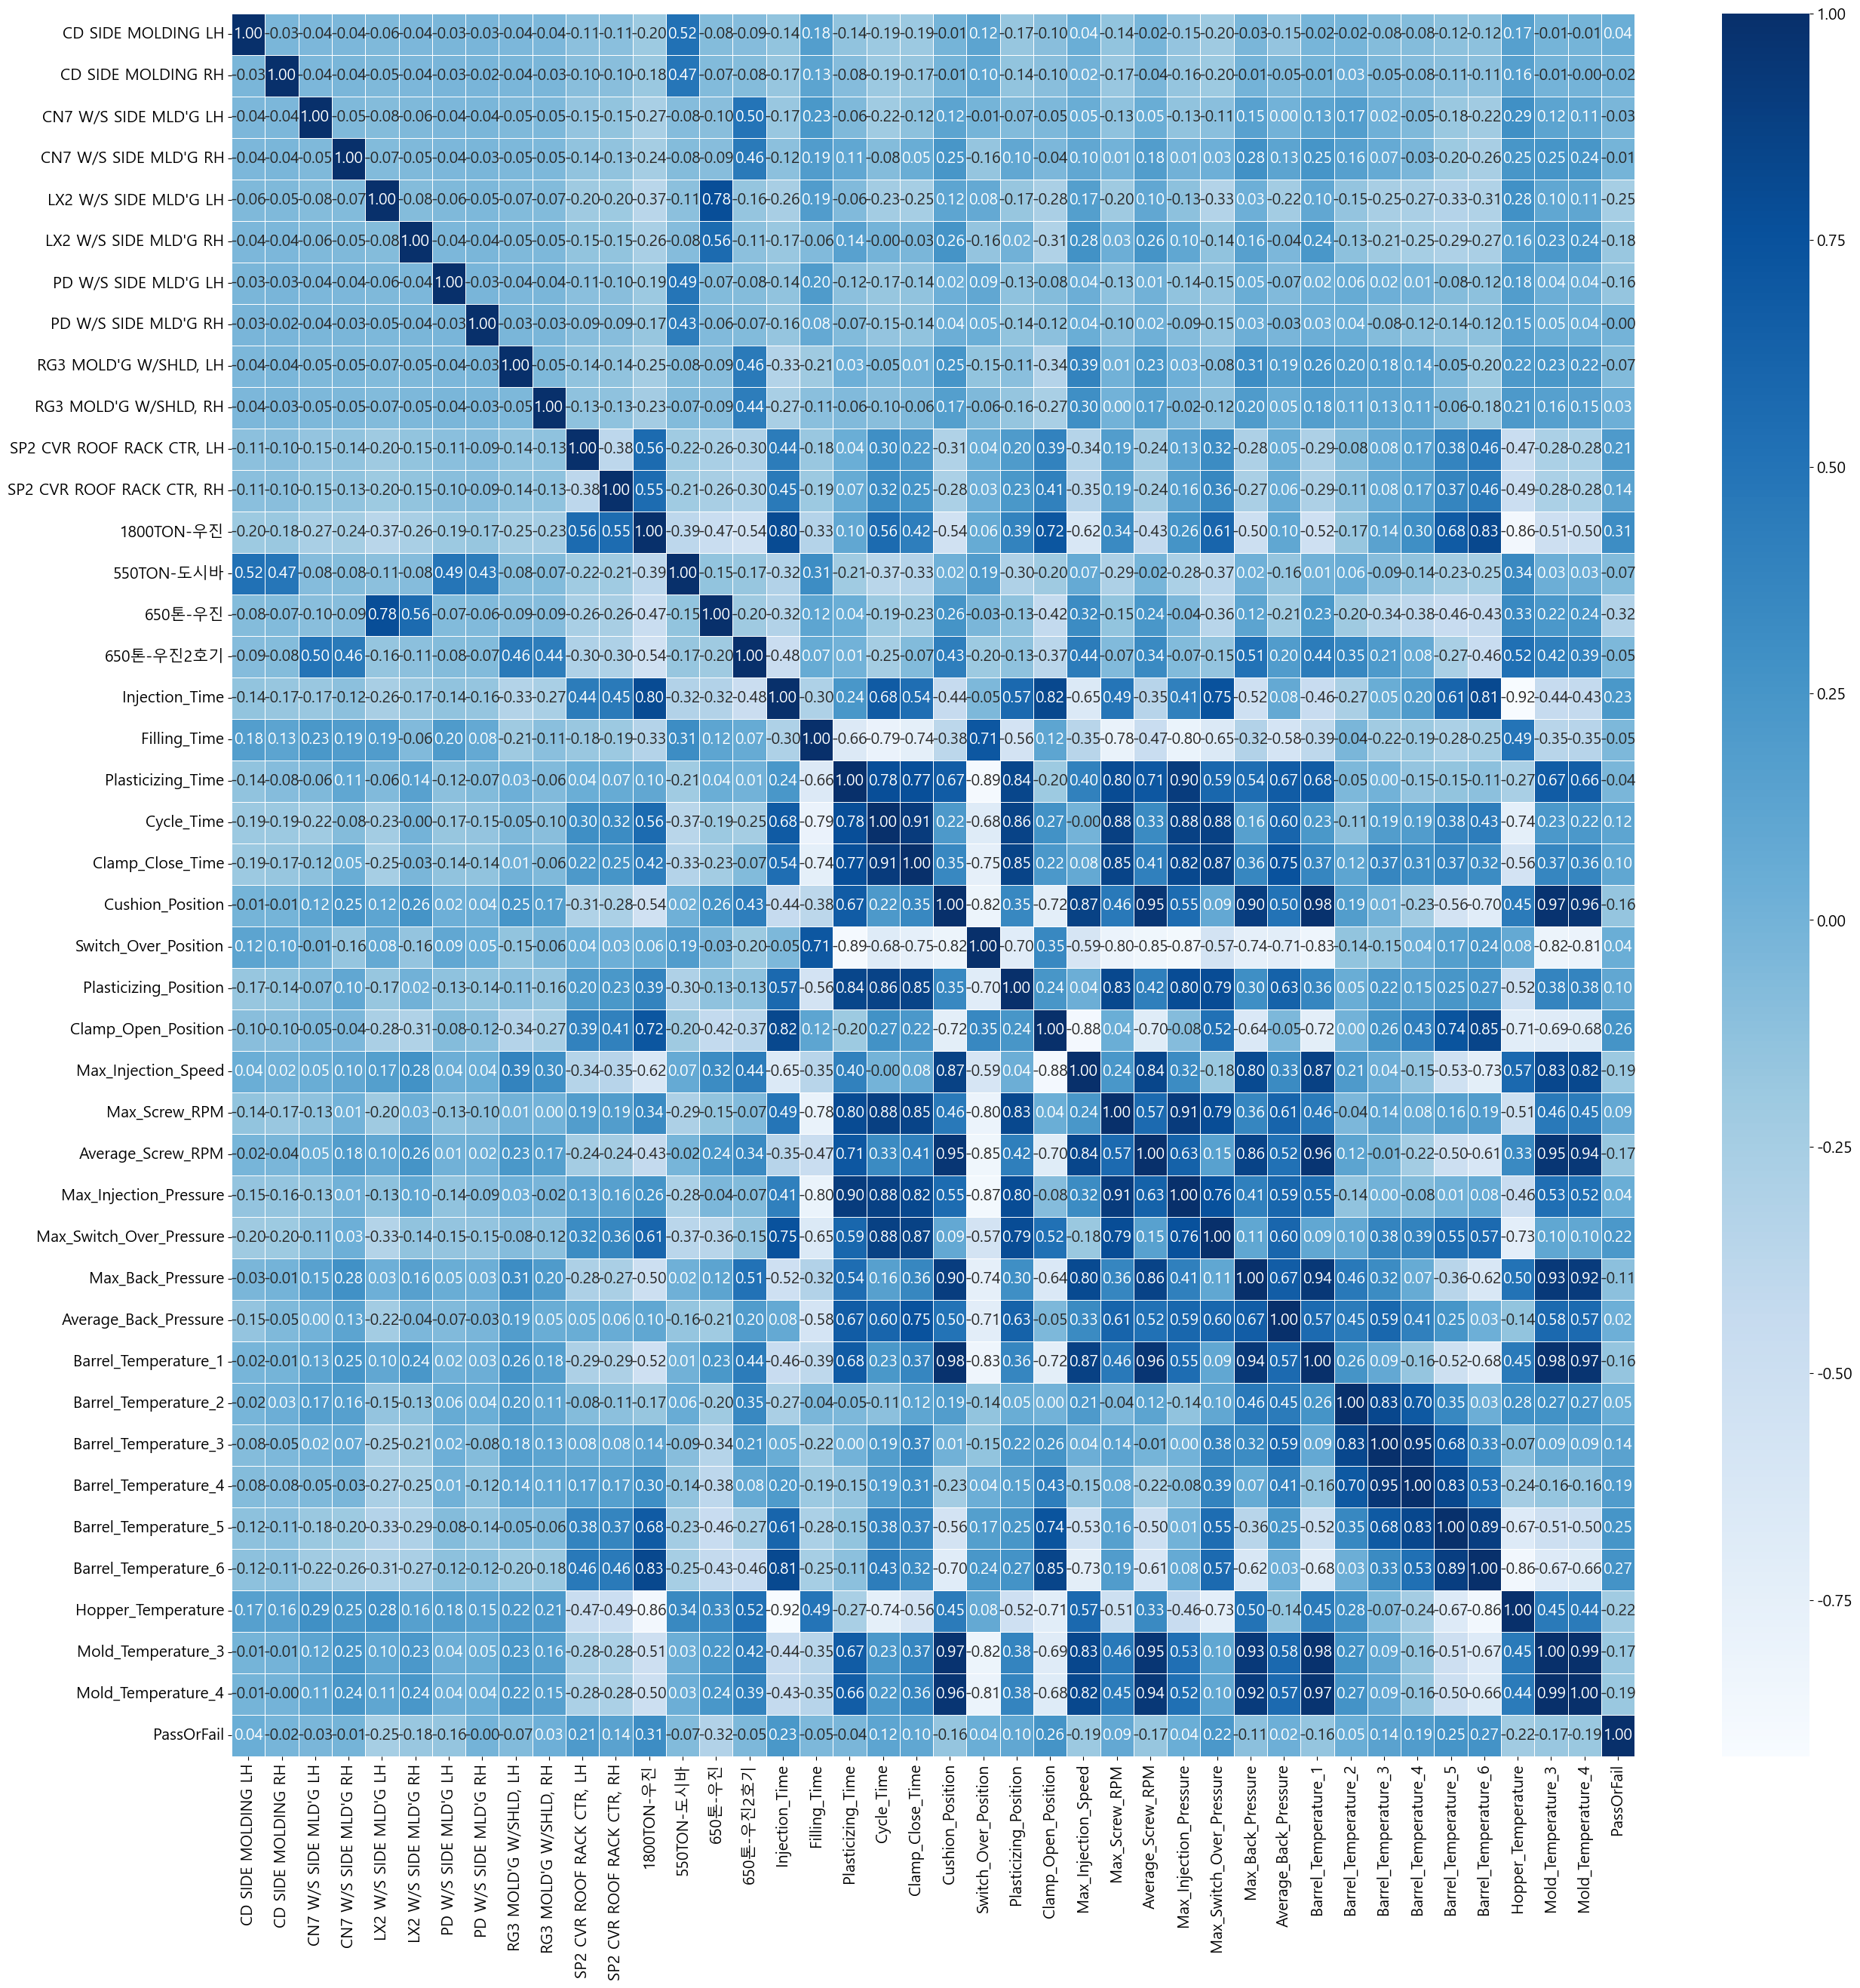

In [105]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(data = final_final_final_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')